/home/yobd/.local/lib/python3.7/site-packages/astropy/table/table.py:2020: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  keep_mask[row_specifier] = False


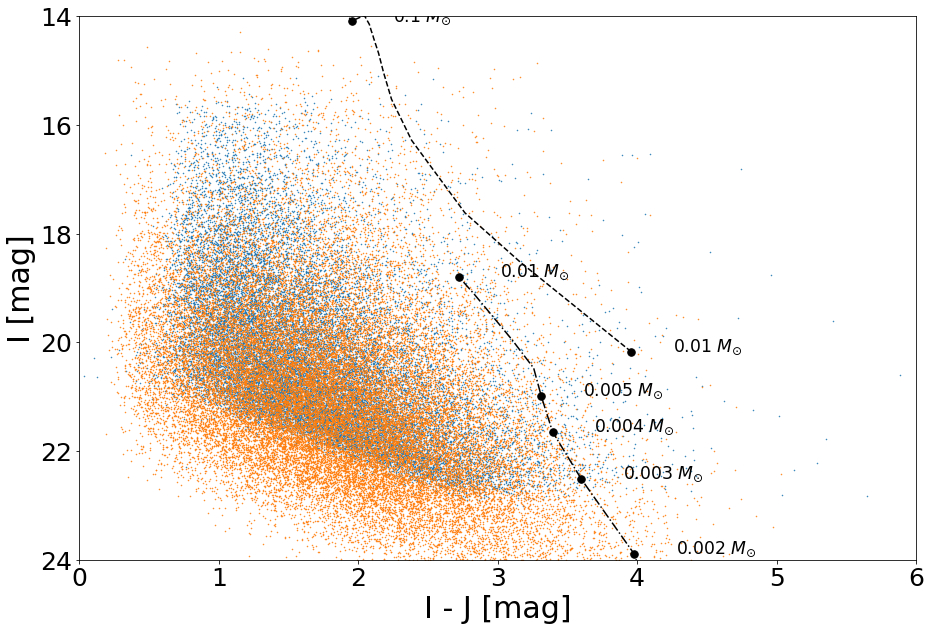

In [1]:
from scipy import interpolate
from astropy.io import ascii
from astropy.table import Table, vstack
from scipy import integrate
from scipy.optimize import curve_fit
from scipy.stats import powerlaw
import matplotlib.pyplot as plt
import numpy as np

# Measures the magnitude offset due to the distance of the source with respect to us
# dist -- The distance to the object

dist = 150
DM = 5 * np.log10(dist) - 5

# Mass column from the BT-Settl models

bt_mass = np.array([0.01, 0.015, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.072, 0.075, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4])

# I magnitudes from the BT-Settl models with the magnitude offset applied

bt_I = np.array([14.291, 12.655, 11.737, 10.403, 9.648, 9.158, 8.800, 8.519, 8.462, 8.391, 8.270, 8.105, 8.209, 7.183, 6.466, 5.937, 5.533, 5.211, 4.916, 4.646, 4.417, 4.212, 4.016, 3.838, 3.669, 3.495])
bt_I = bt_I + DM

# J magnitudes from the BT-Settl models with the magnitude offset applied

bt_J = np.array([10.334, 9.488, 8.972, 8.020, 7.409, 6.976, 6.654, 6.409, 6.358, 6.297, 6.190, 6.061, 6.256, 5.516, 5.006, 4.636, 4.336, 4.098, 3.868, 3.658, 3.479, 3.315, 3.156, 3.012, 2.873, 2.730])
bt_J = bt_J + DM

# I - J color from the BT-Settl models

bt_color_I_J = bt_I - bt_J

# Mass column from the AMES-Dusty models

ames_mass = np.array([0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.012, 0.015, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.072, 0.075, 0.08, 0.09, 0.1, 0.11, 0.13, 0.15, 0.175, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.57, 0.6, 0.62, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1, 1.05, 1.1, 1.15, 1.2, 1.3, 1.4])

# I magnitudes from the AMES-Dusty models with the magnitude offset applied and with values corresponding to a mass bigger than 0.01 Solar-masses cut out from the array

ames_I = np.array([21.873, 19.972, 18.007, 16.633, 15.764, 15.106, 14.594, 14.079, 13.635, 13.237, 12.909, 12.427, 11.898, 11.219, 10.237, 9.510, 8.960, 8.742, 8.505, 8.467, 8.185, 8.333, 8.190, 7.767, 7.945, 7.734, 7.546, 7.331, 7.132, 6.765, 6.444, 6.183, 5.968, 5.786, 5.618, 5.407, 5.324, 5.277, 5.074, 4.971, 4.855, 4.751, 4.671, 4.543, 4.460, 4.361, 4.201, 4.110, 4.040, 3.885, 3.731])
ames_I = ames_I + DM
ames_I = ames_I[ames_mass <= 0.01]

# J magnitudes from the AMES-Dusty models with the magnitude offset applied and with values corresponding to a mass bigger than 0.01 Solar-masses cut out from the array

ames_J = np.array([18.000, 15.728, 14.030, 13.034, 12.371, 11.794, 11.336, 10.974, 10.673, 10.404, 10.189, 9.874, 9.475, 8.965, 8.160, 7.584, 7.069, 6.893, 6.686, 6.654, 6.353, 6.544, 6.420, 5.974, 6.268, 6.081, 5.916, 5.720, 5.544, 5.226, 4.946, 4.716, 4.529, 4.370, 4.224, 4.040, 3.968, 3.930, 3.762, 3.679, 3.588, 3.509, 3.452, 3.346, 3.288, 3.211, 3.104, 3.057, 3.018, 2.910, 2.790])
ames_J = ames_J + DM
ames_J = ames_J[ames_mass <= 0.01]

# Only retain the array elements pertaining to masses below 0.01 Solar-masses

ames_mass = ames_mass[ames_mass <= 0.01]

# I - J color from the AMES-Dusty models

ames_color_I_J = ames_I - ames_J

# Interpolates the BT-Settl model mass values with its respective color arrays defined above
# This is used later on the figures to plot the points in the diagram where the respective mass thresholds are

color_model_bt_I_J = interpolate.interp1d(bt_mass, bt_color_I_J, kind = 'linear')
mag_model_bt = interpolate.interp1d(bt_mass, bt_I, kind = 'linear')

# Interpolates the AMES-Dusty model mass values with its respective color arrays defined above
# This is used later on the figures to plot the points in the diagram where the respective mass thresholds are

color_model_ames_I_J = interpolate.interp1d(ames_mass, ames_color_I_J, kind = 'linear')
mag_model_ames = interpolate.interp1d(ames_mass, ames_I, kind = 'linear')

# Creates a continuous array connecting both models
# This is used to build an interpolation at the ends of both models

full_mass = np.hstack((ames_mass, bt_mass))
full_color_I_J = np.hstack((ames_color_I_J, bt_color_I_J))
full_mag = np.hstack((ames_I, bt_I))

# Interpolates the mass values of both models with the respective color arrays defined above
# This is used later on the figures to plot the points in the diagram where the respective mass thresholds are

full_color_interp_I_J = interpolate.interp1d(full_mass, full_color_I_J)
full_mag_interp = interpolate.interp1d(full_mass, full_mag)

# The mass values to be highlighted by the BT-Settl interpolation on the diagrams

m = np.array([0.01, 0.1, 0.2, 0.5, 1])

# The mass values to be highlighted by the AMES-Dusty interpolation on the diagrams

n = np.array([0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01, 0.1, 0.2, 0.5, 1])

# The minimum and maximum values present in the BT-Settl model mass array

min_mass_bt = np.amin(bt_mass)
max_mass_bt = np.amax(bt_mass)

# Only keep the values in the m-array which fall within the BT-Settl model mass array's limits

m = m[np.where(np.logical_and(m >= min_mass_bt, m <= max_mass_bt))]

# The minimum and maximum values present in the AMES-COND model mass array

min_mass_ames = np.amin(ames_mass)
max_mass_ames = np.amax(ames_mass)

# Only keep the values in the n-array which fall within the AMES-COND model mass array's limits

n = n[np.where(np.logical_and(n >= min_mass_ames, n <= max_mass_ames))]

# Reads the Subaru I-band catalog, the faint sources catalog and the Besançon galaxy model catalog and stores them into Table objects
wsi = ascii.read('/home/yobd/Documents/Photometry_Output/Full_Catalog_ZP_CT_Aper_PSF.dat')
fs = ascii.read('/home/yobd/Documents/Selection/W-S-I+_Selected_Faint_Sources.dat')
model = ascii.read('/home/yobd/Documents/galaxy_model_ext_applied.dat')

# Removes sources from the model catalog with no extinction estimates
model.remove_rows([model['I_EXT'] == 0])

plt.rc('xtick',labelsize = 25)
plt.rc('ytick',labelsize = 25)

plt.figure(1, figsize = (15, 10))
plt.scatter(wsi['I_MAG_SUBARU'] - wsi['jAperMag3'], wsi['I_MAG_SUBARU'], marker = '.', s = 1)#, label = 'i-Band Sources')
plt.scatter(model['I-J_NEW'], model['I_NEW'], marker = '.', s = 1)
plt.plot(bt_color_I_J, bt_I, label = 'BT-Settl', color = 'k', linestyle = '--')
plt.plot(ames_color_I_J, ames_I, label = 'AMES Dusty', color = 'k', linestyle = '-.')
plt.plot(color_model_bt_I_J(m), mag_model_bt(m), '.', markersize = 15, color = 'k')
for m1 in m: plt.text(color_model_bt_I_J(m1) + 0.3, mag_model_bt(m1), str(m1) + ' $M_{\odot}$', clip_on = True, fontsize = 'xx-large')
plt.plot(color_model_ames_I_J(n), mag_model_ames(n), '.', markersize = 15, color = 'k')
for n1 in n: plt.text(color_model_ames_I_J(n1) + 0.3, mag_model_ames(n1), str(n1) + ' $M_{\odot}$', clip_on = True, fontsize = 'xx-large')
#plt.arrow(5, 14, x_ext_0 - x_ext_1, y_ext_0 - y_ext_1, head_width = 0.1, color = 'k')
plt.xlabel('I - J [mag]', fontsize = 30)
plt.ylabel('I [mag]', fontsize = 30)
plt.gca().invert_yaxis()
plt.xlim(0, 6)
plt.ylim(24, 14)
#plt.legend(fontsize = 'large', loc = 1)
plt.show()

[0.5 0.7 0.9 1.1 1.3 1.5 1.7 1.9 2.1 2.3 2.5 2.7 2.9 3.1 3.3 3.5 3.7 3.9
 4.1 4.3 4.5 4.7 4.9 5.1 5.3 5.5 5.7 5.9 6.1 6.3 6.5 6.7]
[15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5 20.  20.5 21.  21.5
 22.  22.5 23. ]


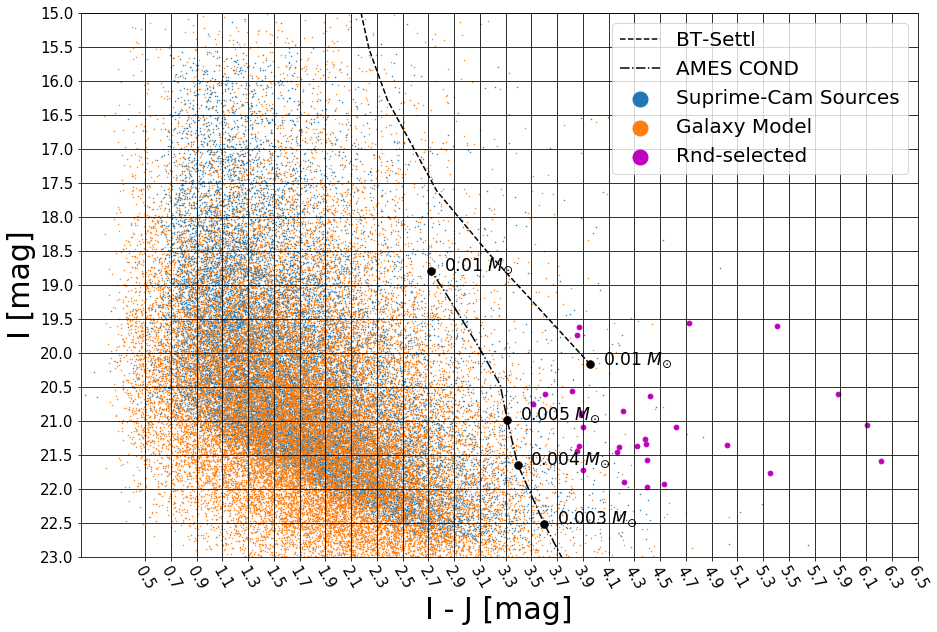

In [2]:
import random

# Creates a sub-sample from a catalog with only the sources inside a given cell
def in_cell(catalog, xdata, ydata, xedges, yedges):
    new_catalog = Table.copy(catalog)
    new_xdata = np.copy(xdata)
    new_ydata = np.copy(ydata)
    
    new_catalog = new_catalog[new_xdata > xedges[0]]
    new_ydata = new_ydata[new_xdata > xedges[0]]
    new_xdata = new_xdata[new_xdata > xedges[0]]
    
    new_catalog = new_catalog[new_xdata < xedges[1]]
    new_ydata = new_ydata[new_xdata < xedges[1]]
    new_xdata = new_xdata[new_xdata < xedges[1]]
    
    new_catalog = new_catalog[new_ydata > yedges[0]]
    new_xdata = new_xdata[new_ydata > yedges[0]]
    new_ydata = new_ydata[new_ydata > yedges[0]]
    
    new_catalog = new_catalog[new_ydata < yedges[1]]
    new_xdata = new_xdata[new_ydata < yedges[1]]
    new_ydata = new_ydata[new_ydata < yedges[1]]
    
    return new_catalog


# Performs the random-selection of sources from the faint sources selection
i = 0
j = 0
fs_selected = Table()

while i < len(bin_edges_y) - 1:
    while j < len(bin_edges_x) - 1:
        fs_in_cell = in_cell(fs, fs['I_MAG_SUBARU'] - fs['jAperMag3'], fs['I_MAG_SUBARU'], bin_edges_x[j:j + 2], bin_edges_y[i:i + 2])
        model_in_cell = in_cell(model, model['I-J_NEW'], model['I_NEW'], bin_edges_x[j:j + 2], bin_edges_y[i:i + 2])
        if len(fs_in_cell) > len(model_in_cell):
            idx = random.sample(range(0, len(fs_in_cell)), len(model_in_cell))
            fs_in_cell.remove_rows(idx)
            fs_selected = vstack([fs_selected, fs_in_cell])
        j += 1
    j = 0
    i += 1

plt.rc('xtick',labelsize = 15)
plt.rc('ytick',labelsize = 15)

plt.figure(1, figsize = (15, 10))
plt.scatter(wsi['I_MAG_SUBARU'] - wsi['jAperMag3'], wsi['I_MAG_SUBARU'], marker = '.', s = 1, label = 'Suprime-Cam Sources')
plt.scatter(model['I-J_NEW'], model['I_NEW'], marker = '.', s = 1, label = 'Galaxy Model')
plt.scatter(fs_selected['I_MAG_SUBARU'] - fs_selected['jAperMag3'], fs_selected['I_MAG_SUBARU'], marker = '.', s = 90, color = 'm', label = 'Rnd-selected')
plt.plot(bt_color_I_J, bt_I, label = 'BT-Settl', color = 'k', linestyle = '--')
plt.plot(ames_color_I_J, ames_I, label = 'AMES COND', color = 'k', linestyle = '-.')
plt.plot(color_model_bt_I_J(m), mag_model_bt(m), '.', markersize = 15, color = 'k')
for m1 in m: plt.text(color_model_bt_I_J(m1) + 0.1, mag_model_bt(m1), str(m1) + ' $M_{\odot}$', clip_on = True, fontsize = 'xx-large')
plt.plot(color_model_ames_I_J(n), mag_model_ames(n), '.', markersize = 15, color = 'k')
for n1 in n: plt.text(color_model_ames_I_J(n1) + 0.1, mag_model_ames(n1), str(n1) + ' $M_{\odot}$', clip_on = True, fontsize = 'xx-large')
#plt.arrow(5, 14, x_ext_0 - x_ext_1, y_ext_0 - y_ext_1, head_width = 0.1, color = 'k')
plt.xlabel('I - J [mag]', fontsize = 30)
plt.ylabel('I [mag]', fontsize = 30)
plt.gca().invert_yaxis()
plt.xticks(np.arange(min(bin_edges_x), max(bin_edges_x) + 1, 0.2), rotation = (-60))
plt.yticks(np.arange(min(bin_edges_y), max(bin_edges_y) + 1, 0.5))
plt.grid(color = 'k')
#plt.axes.Axes.set_xticklabels(rotation = (45))
lgnd = plt.legend(fontsize = 20)
lgnd.legendHandles[2]._sizes = [900]
lgnd.legendHandles[3]._sizes = [900]
lgnd.legendHandles[4]._sizes = [900]
plt.xlim(0, 6.5)
plt.ylim(23, 15)
plt.show()

# Stores the sources from the faint sources selection which survived the random-selection process
ascii.write(fs_selected, '/home/yobd/Documents/Selection/rnd_selected.dat', format = 'csv', overwrite = True)